# Clustering - Tuto 0

In this 1st tuto, we simply play with KMeans and GMM on a toy multimodal dataset

The objective is to illustrate a "clustering" method

In [79]:
# Libraries import section
import os

import xarray as xr
import numpy as np
from scipy import stats
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="deep", color_codes=True)

(1500, 2)


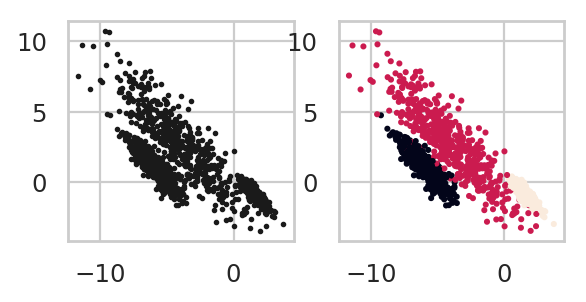

In [80]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=[1.0, 2.5, 0.5])
print X.shape 

transformation = [[0.90834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X, transformation)

plt.figure(figsize=plt.figaspect(1), dpi=160, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.plot(X[:, 0], X[:, 1],'k.',markersize=3)
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], 3, c=y)

In [81]:
# Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.predict(X)
n_clusters_ = kmeans.n_clusters
kmeans.cluster_centers_.shape

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.571


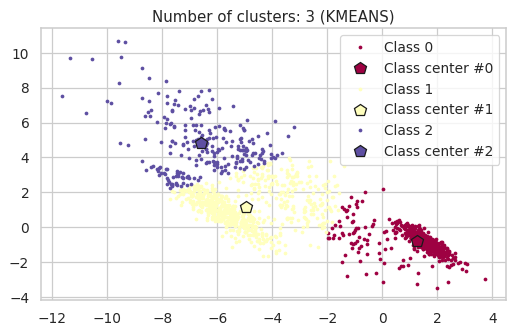

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=plt.figaspect(0.6), dpi=90, facecolor='w', edgecolor='k')

unique_labels = np.unique(labels)
n_clusters_ = unique_labels.shape[0]
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(range(n_clusters_), colors):
#     print "Cluster: ", k, col
    class_members = labels == k

    plt.plot(X[class_members,0], X[class_members,1], '.', 
             markerfacecolor=tuple(col), markeredgecolor='none', label='Class %i'%(k))

    cluster_center = kmeans.cluster_centers_[k,:]
    plt.plot(cluster_center[0], cluster_center[1], 'p', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10, label='Class center #%i'%(k))

# plt.xlim(-3,9)
# plt.ylim(-3,3)
# plt.xlabel(Slabel)
# plt.ylabel(Tlabel)
plt.title('Number of clusters: %i (KMEANS)' % n_clusters_)
plt.legend()
plt.show()

In [83]:
# Clustering with GMM
gmm = GMM(n_components=3, random_state=0).fit(X)
labels = gmm.predict(X)
n_clusters_ = gmm.n_components
print gmm.covariances_

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

[[[ 0.22671863 -0.21191637]
  [-0.21191637  0.26325252]]

 [[ 1.01130924 -0.93278313]
  [-0.93278313  1.11160081]]

 [[ 6.09488507 -5.54786603]
  [-5.54786603  6.53536877]]]
Silhouette Coefficient: 0.464


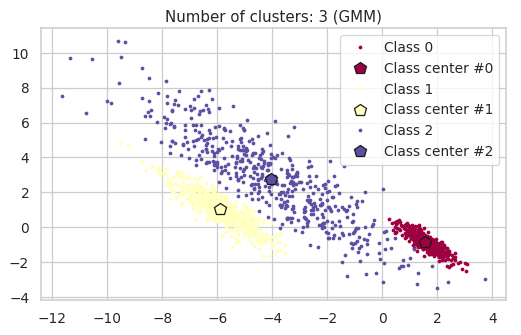

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=plt.figaspect(0.6), dpi=90, facecolor='w', edgecolor='k')

unique_labels = np.unique(labels)
n_clusters_ = unique_labels.shape[0]
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(range(n_clusters_), colors):
#     print "Cluster: ", k, col
    class_members = labels == k

    plt.plot(X[class_members,0], X[class_members,1], '.', 
             markerfacecolor=tuple(col), markeredgecolor='none', label='Class %i'%(k))

    cluster_center = gmm.means_[k,:]
    plt.plot(cluster_center[0], cluster_center[1], 'p', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10, label='Class center #%i'%(k))

# plt.xlim(-3,9)
# plt.ylim(-3,3)
# plt.xlabel(Slabel)
# plt.ylabel(Tlabel)
plt.title('Number of clusters: %i (GMM)' % n_clusters_)
plt.legend()
plt.show()

In [85]:
def plot_GMMellipse(gmm,id,ik,col,ax,label="",std=[1],main_axes=True,**kwargs):
    """
        Plot an 1-STD ellipse for a given component (ik) and 2 given dimensions (id) 
        of the GMM model gmm
        This is my routine, simply working with a matplotlib plot method
        I also added the possiblity to plot the main axes of the ellipse
    """
    covariances = gmm.covariances_[ik][(id[0],id[0],id[1],id[1]),(id[0],id[1],id[0],id[1])].reshape(2,2)
    d, v = np.linalg.eigh(covariances) #  eigenvectors have unit length
    d = np.diag(d)
    theta = np.arange(0,2*np.pi,0.02)
    x = np.sqrt(d[0,0])*np.cos(theta)
    y = np.sqrt(d[1,1])*np.sin(theta)
    xy = np.array((x,y)).T
    ii = 0
    for nstd in np.array(std):
        ii+=1
        ellipse = np.inner(v,xy).T
        ellipse = nstd*ellipse + np.ones((theta.shape[0], 1))*gmm.means_[ik,(id[0],id[1])]
        if ii == 1:
#            p = ax.plot(ellipse[:,0], ellipse[:,1], color=col, axes=ax, label=("%s (%i-std)")%(label,nstd),**kwargs)
            p = ax.plot(ellipse[:,0], ellipse[:,1], color=col, axes=ax, label=("%s")%(label),**kwargs)
        else:
            p = ax.plot(ellipse[:,0], ellipse[:,1], color=col, axes=ax,**kwargs)
    if main_axes: # Add Main axes:
        for idir in range(2):
            l = np.sqrt(d[idir,idir])*v[:,idir].T
            start = gmm.means_[ik,(id[0],id[1])]-l
            endpt = gmm.means_[ik,(id[0],id[1])]+l
            linex = [start[0], endpt[0]]
            liney = [start[1], endpt[1]]
            plt.plot(linex,liney,color=col,axes=ax)
    return p,ax

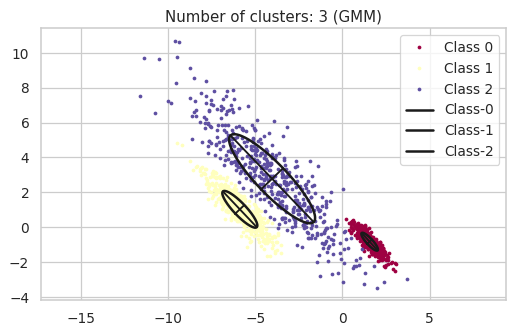

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=plt.figaspect(0.6), dpi=90, facecolor='w', edgecolor='k')

unique_labels = np.unique(labels)
n_clusters_ = unique_labels.shape[0]
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(range(n_clusters_), colors):
#     print "Cluster: ", k, col
    class_members = labels == k
    plt.plot(X[class_members,0], X[class_members,1], '.', 
             markerfacecolor=tuple(col), markeredgecolor='none', label='Class %i'%(k))

for k, col in zip(range(n_clusters_), colors):
#     cluster_center = gmm.means_[k,:]
#     plt.plot(cluster_center[0], cluster_center[1], 'p', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=10, label='Class center #%i'%(k))
    el,ax = plot_GMMellipse(gmm,[0,1],k,'k',ax,label="Class-%i"%(k),linewidth=2)

ax.axis('equal')
plt.title('Number of clusters: %i (GMM)' % n_clusters_)
plt.legend()
plt.show()